In [3]:
import datetime as dt
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
end = dt.datetime.now()
start = end - dt.timedelta(days = 365)
start, end

(datetime.datetime(2024, 11, 30, 20, 46, 19, 880002),
 datetime.datetime(2025, 11, 30, 20, 46, 19, 880002))

In [6]:
stockList = ["AAPL", "NVDA", "GOOG", "META", "AMZN", "AVGO", "MSFT", "TSM"]
stockList

['AAPL', 'NVDA', 'GOOG', 'META', 'AMZN', 'AVGO', 'MSFT', 'TSM']

In [7]:
df = yf.download(stockList, start, end)
print(df.head())

[*********************100%***********************]  8 of 8 completed

Price            Close                                                  \
Ticker            AAPL        AMZN        AVGO        GOOG        META   
Date                                                                     
2024-12-02  238.511261  210.710007  164.892761  172.226212  590.971802   
2024-12-03  241.557495  213.440002  166.516815  172.266052  611.726501   
2024-12-04  241.915878  218.160004  168.903427  175.322678  611.856140   
2024-12-05  241.945740  220.550003  168.814316  173.550430  607.021301   
2024-12-06  241.746643  227.029999  177.786316  175.720932  621.814758   

Price                                                 High              ...  \
Ticker            MSFT        NVDA         TSM        AAPL        AMZN  ...   
Date                                                                    ...   
2024-12-02  427.824036  138.590256  191.724426  239.705855  212.990005  ...   
2024-12-03  428.042419  140.219803  196.152634  241.667000  214.020004  ...   
2024-12-04  

In [8]:
returnsDf = np.log(df["Close"] / df["Close"].shift(1))
returnsDf

Ticker,AAPL,AMZN,AVGO,GOOG,META,MSFT,NVDA,TSM
Date,,,,,,,,
2024-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-03,0.012691,0.012873,0.009801,0.000231,0.034517,0.000510,0.011689,0.022834
2024-12-04,0.001483,0.021873,0.014231,0.017588,0.000212,0.014322,0.034201,0.009010
2024-12-05,0.000123,0.010896,-0.000528,-0.010160,-0.007933,0.011818,-0.000482,0.017828
2024-12-06,-0.000823,0.028958,0.051783,0.012429,0.024078,0.002144,-0.018226,-0.006285
...,...,...,...,...,...,...,...,...
2025-11-21,0.019490,0.016217,-0.019272,0.032803,0.008619,-0.013277,-0.009791,-0.008832
2025-11-24,0.016186,0.025014,0.105255,0.060913,0.031146,0.003974,0.020309,0.034236
2025-11-25,0.003798,0.014870,0.018533,0.016104,0.037098,0.006288,-0.026252,0.000140


In [9]:
finalIte = returnsDf.corr()
finalIte

Ticker,AAPL,AMZN,AVGO,GOOG,META,MSFT,NVDA,TSM
Ticker,,,,,,,,
AAPL,1.000000,0.564673,0.326437,0.492932,0.483740,0.494809,0.410078,0.409101
AMZN,0.564673,1.000000,0.462625,0.542772,0.676849,0.610030,0.558683,0.529690
AVGO,0.326437,0.462625,1.000000,0.459154,0.459084,0.454017,0.644308,0.732393
GOOG,0.492932,0.542772,0.459154,1.000000,0.449956,0.449948,0.466508,0.509014
META,0.483740,0.676849,0.459084,0.449956,1.000000,0.643518,0.521602,0.512774
MSFT,0.494809,0.610030,0.454017,0.449948,0.643518,1.000000,0.625336,0.545429
NVDA,0.410078,0.558683,0.644308,0.466508,0.521602,0.625336,1.000000,0.778547
TSM,0.409101,0.529690,0.732393,0.509014,0.512774,0.545429,0.778547,1.000000


<Axes: xlabel='Ticker', ylabel='Ticker'>

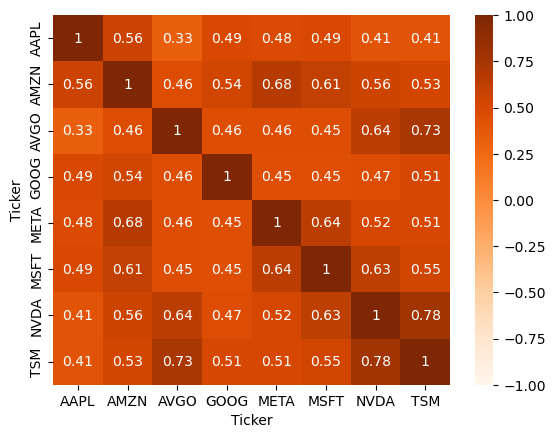

In [10]:
sns.heatmap(finalIte, cmap = "Oranges", vmin = -1, vmax = 1, annot = True) #RdBu